# NHS Practice Level Prescribing Analysis
Bradley Wuon Seok Choi

IST 652: Scripting for Data Analysis

Data Description: Practice Level Prescribing Data

Practice level prescribing data is a list of all medicines, dressings and appliances that are prescribed by all practices in England and dispensed in the community each month. The data covers NHS prescriptions written in England and dispensed in the community in the UK. Prescriptions written in England but dispensed outside England are included. The data includes prescriptions written by GPs and other non-medical prescribers (such as nurses and pharmacists) who are attached to practices. 

Time frame: June 2018 - December 2018

https://digital.nhs.uk/data-and-information/publications/statistical/practice-level-prescribing-data

In [1]:
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import os
import numpy as np

# Data Pre-Processing

In [2]:
# Merging six NHS .csv files 
csv_header = 'SHA, PCT, PRACTICE, BNF.CODE, BNF.NAME, ITEMS, NIC, ACT.COST, QUANTITY, PERIOD'
csv_out = 'consolidated.csv'
csv_dir = '/Users/wuonseokchoi/PycharmProjects/NHSPrescriptionData/Practice Level Prescribing/'

dir_tree = os.walk(csv_dir)
for dirpath, dirnames, filenames in dir_tree:
   pass

csv_list = []
for file in filenames:
   if file.endswith('.csv'):
      csv_list.append(file)

csv_merge = open(csv_out, 'w')
csv_merge.write(csv_header)
csv_merge.write('\n')

for file in csv_list:
   csv_in = open(csv_dir + file)
   for line in csv_in:
      if line.startswith(csv_header):
         continue
      csv_merge.write(line)
   csv_in.close()
   csv_merge.close()
print('Verify consolidated CSV file : ' + csv_out)


Verify consolidated CSV file : consolidated.csv


In [3]:
# Reading in the consolidated.csv
df = pd.read_csv('consolidated.csv', header = 0)
df.head()

/Users/wuonseokchoi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SHA,PCT,PRACTICE,BNF.CODE,BNF.NAME,ITEMS,NIC,ACT.COST,QUANTITY,PERIOD
0,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD
1,Q44,01C,N81002,0101021B0AAALAL,Sod Algin/Pot Bicarb_Susp S/F,1,10.24,9.52,1000,201812
2,Q44,01C,N81002,0101021B0AAAPAP,Sod Alginate/Pot Bicarb_Tab Chble 500mg,1,3.07,2.86,60,201812
3,Q44,01C,N81002,0101021B0BEACAH,Gaviscon_Liq Orig Aniseed Relief,1,12.99,12.07,900,201812
4,Q44,01C,N81002,0101021B0BEADAJ,Gaviscon Infant_Sach 2g (Dual Pack) S/F,3,81.94,76.09,255,201812


In [4]:
# Simplifying the column names
# Editing the column names
df.columns = ['SHA', 'PCT', 'PRACTICE', 'BNFCODE', 'BNFNAME', 'ITEMS', 'NIC', 'ACTCOST', 'QUANTITY', 'PERIOD']

In [5]:
# Simplifying via removing unnecessary variables
del df['SHA']
del df['PCT']
del df['PERIOD']

In [6]:
# Deleting the first row
df = df.iloc[1:]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9505530 entries, 1 to 9505530
Data columns (total 7 columns):
PRACTICE    object
BNFCODE     object
BNFNAME     object
ITEMS       object
NIC         object
ACTCOST     object
QUANTITY    object
dtypes: object(7)
memory usage: 507.7+ MB


In [8]:
df.describe()

,PRACTICE,BNFCODE,BNFNAME,ITEMS,NIC,ACTCOST,QUANTITY
count,9505530,9505530,9505530,9505530,9505530.0,9505530.00,9505530.0
unique,9473,22298,22249,1780,112794.0,141846.00,32392.0
top,M85063,0603020T0AAACAC,Prednisolone_Tab 5mg,1,3.6,6.96,56.0
freq,3873,7865,7865,3719883,12418.0,13825.00,531236.0


In [9]:
df.head()

,PRACTICE,BNFCODE,BNFNAME,ITEMS,NIC,ACTCOST,QUANTITY
1,N81002,0101021B0AAALAL,Sod Algin/Pot Bicarb_Susp S/F,1,10.24,9.52,1000
2,N81002,0101021B0AAAPAP,Sod Alginate/Pot Bicarb_Tab Chble 500mg,1,3.07,2.86,60
3,N81002,0101021B0BEACAH,Gaviscon_Liq Orig Aniseed Relief,1,12.99,12.07,900
4,N81002,0101021B0BEADAJ,Gaviscon Infant_Sach 2g (Dual Pack) S/F,3,81.94,76.09,255
5,N81002,0101021B0BEAIAL,Gaviscon Advance_Liq (Aniseed) (Reckitt),11,55.29,51.76,5400


In [10]:
df['ACTCOST'] = df['ACTCOST'].convert_objects(convert_numeric=True)
df['ITEMS'] = df['ITEMS'].convert_objects(convert_numeric=True)
df['NIC'] = df['NIC'].convert_objects(convert_numeric=True)
df['QUANTITY'] = df['QUANTITY'].convert_objects(convert_numeric=True)

/Users/wuonseokchoi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
/Users/wuonseokchoi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
/Users/wuonseokchoi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9505530 entries, 1 to 9505530
Data columns (total 7 columns):
PRACTICE    object
BNFCODE     object
BNFNAME     object
ITEMS       int64
NIC         float64
ACTCOST     float64
QUANTITY    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 507.7+ MB


In [12]:
# Importing the secondary data
# The Practice location data
location_df = pd.read_csv('T201806ADDR BNFT.CSV', header = None)
location_df.head()

,0,1,2,3,4,5,6,7
0,201806,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON-ON-TEES,CLEVELAND,TS18 1HU
1,201806,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
2,201806,A81004,BLUEBELL MEDICAL CENTRE,TRIMDON AVENUE,ACKLAM,MIDDLESBROUGH,,TS5 8SB
3,201806,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,,TS14 7DJ
4,201806,A81006,TENNANT STREET MEDICAL PRACTICE,TENNANT ST MEDICAL PRACT,TENNANT STREET,STOCKTON-ON-TEES,CLEVELAND,TS18 2AT


In [13]:
#Editing the column names
location_df.columns = ['YEARM', 'PRACTICE', 'PRACTICEFULLNAME', 'PRACETICENAME', 'STNAME', 'CITY', 'COUNTY', 'POSTALCODE']
location_df.head()

,YEARM,PRACTICE,PRACTICEFULLNAME,PRACETICENAME,STNAME,CITY,COUNTY,POSTALCODE
0,201806,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON-ON-TEES,CLEVELAND,TS18 1HU
1,201806,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
2,201806,A81004,BLUEBELL MEDICAL CENTRE,TRIMDON AVENUE,ACKLAM,MIDDLESBROUGH,,TS5 8SB
3,201806,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,,TS14 7DJ
4,201806,A81006,TENNANT STREET MEDICAL PRACTICE,TENNANT ST MEDICAL PRACT,TENNANT STREET,STOCKTON-ON-TEES,CLEVELAND,TS18 2AT


In [14]:
location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9553 entries, 0 to 9552
Data columns (total 8 columns):
YEARM               9553 non-null int64
PRACTICE            9553 non-null object
PRACTICEFULLNAME    9553 non-null object
PRACETICENAME       9553 non-null object
STNAME              9553 non-null object
CITY                9553 non-null object
COUNTY              9553 non-null object
POSTALCODE          9553 non-null object
dtypes: int64(1), object(7)
memory usage: 597.1+ KB


In [15]:
# Simplifying via removing unnecessary variables
del location_df['YEARM']
del location_df['PRACETICENAME']

In [16]:
type(location_df)

pandas.core.frame.DataFrame

In [17]:
# Merging
# Merging Practice and the Conslidated.csv
new_df = df.merge(location_df, left_on='PRACTICE', right_on='PRACTICE')
new_df.head()

,PRACTICE,BNFCODE,BNFNAME,ITEMS,NIC,ACTCOST,QUANTITY,PRACTICEFULLNAME,STNAME,CITY,COUNTY,POSTALCODE
0,N81002,0101021B0AAALAL,Sod Algin/Pot Bicarb_Susp S/F,1,10.24,9.52,1000.0,KENMORE MEDICAL CENTRE,60-62 ALDERLEY ROAD,WILMSLOW,CHESHIRE,SK9 1PA
1,N81002,0101021B0AAAPAP,Sod Alginate/Pot Bicarb_Tab Chble 500mg,1,3.07,2.86,60.0,KENMORE MEDICAL CENTRE,60-62 ALDERLEY ROAD,WILMSLOW,CHESHIRE,SK9 1PA
2,N81002,0101021B0BEACAH,Gaviscon_Liq Orig Aniseed Relief,1,12.99,12.07,900.0,KENMORE MEDICAL CENTRE,60-62 ALDERLEY ROAD,WILMSLOW,CHESHIRE,SK9 1PA
3,N81002,0101021B0BEADAJ,Gaviscon Infant_Sach 2g (Dual Pack) S/F,3,81.94,76.09,255.0,KENMORE MEDICAL CENTRE,60-62 ALDERLEY ROAD,WILMSLOW,CHESHIRE,SK9 1PA
4,N81002,0101021B0BEAIAL,Gaviscon Advance_Liq (Aniseed) (Reckitt),11,55.29,51.76,5400.0,KENMORE MEDICAL CENTRE,60-62 ALDERLEY ROAD,WILMSLOW,CHESHIRE,SK9 1PA


In [18]:
new_df[:5]

,PRACTICE,BNFCODE,BNFNAME,ITEMS,NIC,ACTCOST,QUANTITY,PRACTICEFULLNAME,STNAME,CITY,COUNTY,POSTALCODE
0,N81002,0101021B0AAALAL,Sod Algin/Pot Bicarb_Susp S/F,1,10.24,9.52,1000.0,KENMORE MEDICAL CENTRE,60-62 ALDERLEY ROAD,WILMSLOW,CHESHIRE,SK9 1PA
1,N81002,0101021B0AAAPAP,Sod Alginate/Pot Bicarb_Tab Chble 500mg,1,3.07,2.86,60.0,KENMORE MEDICAL CENTRE,60-62 ALDERLEY ROAD,WILMSLOW,CHESHIRE,SK9 1PA
2,N81002,0101021B0BEACAH,Gaviscon_Liq Orig Aniseed Relief,1,12.99,12.07,900.0,KENMORE MEDICAL CENTRE,60-62 ALDERLEY ROAD,WILMSLOW,CHESHIRE,SK9 1PA
3,N81002,0101021B0BEADAJ,Gaviscon Infant_Sach 2g (Dual Pack) S/F,3,81.94,76.09,255.0,KENMORE MEDICAL CENTRE,60-62 ALDERLEY ROAD,WILMSLOW,CHESHIRE,SK9 1PA
4,N81002,0101021B0BEAIAL,Gaviscon Advance_Liq (Aniseed) (Reckitt),11,55.29,51.76,5400.0,KENMORE MEDICAL CENTRE,60-62 ALDERLEY ROAD,WILMSLOW,CHESHIRE,SK9 1PA


In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9495329 entries, 0 to 9495328
Data columns (total 12 columns):
PRACTICE            object
BNFCODE             object
BNFNAME             object
ITEMS               int64
NIC                 float64
ACTCOST             float64
QUANTITY            float64
PRACTICEFULLNAME    object
STNAME              object
CITY                object
COUNTY              object
POSTALCODE          object
dtypes: float64(3), int64(1), object(8)
memory usage: 941.8+ MB


In [20]:
del df, location_df

In [21]:
# Checking for NaN
new_df.isnull().values.any()

False

In [22]:
print("There are {} observations and {} features in this dataset. \n".format(new_df.shape[0],new_df.shape[1]))

There are 9495329 observations and 12 features in this dataset. 



Re-merging the data

In [23]:
# Importing the third data
# The Practice location data
medication = pd.read_csv('Medication.csv')
medication.head()

,BNF Code,Acute_or_Chronic,Drug Name
0,0101010C0BBAAAA,1,Alu-Cap_Cap 475mg
1,0101010G0BBABAB,1,Maalox_Susp 195mg/220mg/5ml S/F
2,0101010G0BBAHAG,1,Maalox_Oral Susp 175mg/200mg/5ml
3,0101010G0BCABAB,1,Mucogel_Susp 195mg/220mg/5ml S/F
4,0101010I0BEAAAC,1,Oromag 160_Cap


In [24]:
# Chronic or Acute
# It is a binary
# 0 is Acute & 1 is Chronic

In [25]:
# Merging
# Merging The Merged and the Medication Chronic or Acute (Medication.csv)
n_df = new_df.merge(medication, left_on='BNFCODE', right_on='BNF Code')
n_df.head()

,PRACTICE,BNFCODE,BNFNAME,ITEMS,NIC,ACTCOST,QUANTITY,PRACTICEFULLNAME,STNAME,CITY,COUNTY,POSTALCODE,BNF Code,Acute_or_Chronic,Drug Name
0,N81002,0101021B0AAAPAP,Sod Alginate/Pot Bicarb_Tab Chble 500mg,1,3.07,2.86,60.0,KENMORE MEDICAL CENTRE,60-62 ALDERLEY ROAD,WILMSLOW,CHESHIRE,SK9 1PA,0101021B0AAAPAP,1,Sod Alginate/Pot Bicarb_Tab Chble 500mg
1,N81013,0101021B0AAAPAP,Sod Alginate/Pot Bicarb_Tab Chble 500mg,2,6.14,5.72,120.0,HIGH STREET SURGERY,WATERS GREEN MEDICAL CTR,SUNDERLAND STREET,MACCLESFIELD CHESHIRE,SK11 6JL,0101021B0AAAPAP,1,Sod Alginate/Pot Bicarb_Tab Chble 500mg
2,N81021,0101021B0AAAPAP,Sod Alginate/Pot Bicarb_Tab Chble 500mg,2,6.14,5.72,120.0,MCILVRIDE MEDICAL PRACTICE,5 CHESTER ROAD,POYNTON,CHESHIRE,SK12 1EU,0101021B0AAAPAP,1,Sod Alginate/Pot Bicarb_Tab Chble 500mg
3,N81022,0101021B0AAAPAP,Sod Alginate/Pot Bicarb_Tab Chble 500mg,1,3.07,2.86,60.0,WATERHOUSE SURGERY,WELLINGTON ROAD,BOLLINGTON MACCLESFIELD,CHESHIRE,SK10 5JH,0101021B0AAAPAP,1,Sod Alginate/Pot Bicarb_Tab Chble 500mg
4,N81027,0101021B0AAAPAP,Sod Alginate/Pot Bicarb_Tab Chble 500mg,3,10.44,9.83,204.0,READESMOOR MEDICAL GROUP PRACTICE,29-31 WEST STREET,CONGLETON,CHESHIRE,CW12 1JP,0101021B0AAAPAP,1,Sod Alginate/Pot Bicarb_Tab Chble 500mg


In [26]:
# Simplifying via removing redundant variables
del n_df['Drug Name ']
del n_df['BNF Code']

In [27]:
n_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8173814 entries, 0 to 8173813
Data columns (total 13 columns):
PRACTICE            object
BNFCODE             object
BNFNAME             object
ITEMS               int64
NIC                 float64
ACTCOST             float64
QUANTITY            float64
PRACTICEFULLNAME    object
STNAME              object
CITY                object
COUNTY              object
POSTALCODE          object
Acute_or_Chronic    int64
dtypes: float64(3), int64(2), object(8)
memory usage: 873.1+ MB


In [28]:
# Checking for NaN
n_df.isnull().values.any()

False

In [29]:
CoA = pd.DataFrame(n_df['Acute_or_Chronic'].value_counts())
CoA

,Acute_or_Chronic
0,4103353
1,4070461


In [30]:
print("There are {} observations and {} features in this dataset. \n".format(n_df.shape[0],n_df.shape[1]))

There are 8173814 observations and 13 features in this dataset. 



# The working dataset 

In [31]:
df2 = n_df

In [32]:
del new_df, medication, n_df

In [33]:
df2.head()

,PRACTICE,BNFCODE,BNFNAME,ITEMS,NIC,ACTCOST,QUANTITY,PRACTICEFULLNAME,STNAME,CITY,COUNTY,POSTALCODE,Acute_or_Chronic
0,N81002,0101021B0AAAPAP,Sod Alginate/Pot Bicarb_Tab Chble 500mg,1,3.07,2.86,60.0,KENMORE MEDICAL CENTRE,60-62 ALDERLEY ROAD,WILMSLOW,CHESHIRE,SK9 1PA,1
1,N81013,0101021B0AAAPAP,Sod Alginate/Pot Bicarb_Tab Chble 500mg,2,6.14,5.72,120.0,HIGH STREET SURGERY,WATERS GREEN MEDICAL CTR,SUNDERLAND STREET,MACCLESFIELD CHESHIRE,SK11 6JL,1
2,N81021,0101021B0AAAPAP,Sod Alginate/Pot Bicarb_Tab Chble 500mg,2,6.14,5.72,120.0,MCILVRIDE MEDICAL PRACTICE,5 CHESTER ROAD,POYNTON,CHESHIRE,SK12 1EU,1
3,N81022,0101021B0AAAPAP,Sod Alginate/Pot Bicarb_Tab Chble 500mg,1,3.07,2.86,60.0,WATERHOUSE SURGERY,WELLINGTON ROAD,BOLLINGTON MACCLESFIELD,CHESHIRE,SK10 5JH,1
4,N81027,0101021B0AAAPAP,Sod Alginate/Pot Bicarb_Tab Chble 500mg,3,10.44,9.83,204.0,READESMOOR MEDICAL GROUP PRACTICE,29-31 WEST STREET,CONGLETON,CHESHIRE,CW12 1JP,1


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8173814 entries, 0 to 8173813
Data columns (total 13 columns):
PRACTICE            object
BNFCODE             object
BNFNAME             object
ITEMS               int64
NIC                 float64
ACTCOST             float64
QUANTITY            float64
PRACTICEFULLNAME    object
STNAME              object
CITY                object
COUNTY              object
POSTALCODE          object
Acute_or_Chronic    int64
dtypes: float64(3), int64(2), object(8)
memory usage: 873.1+ MB


In [36]:
med_price_avg = df2.groupby('BNFNAME', as_index=False)['ACTCOST'].mean()
med_price_avg.head()

,BNFNAME,ACTCOST
0,365 Non Adherent 10cm x 20cm Pfa Plas Faced Dress,1.588000
1,365 Strips Skin Closure Strips Ster Surg Suture,4.860000
2,3M Micropore Silicone 2.5cm x 5m Surg Adh Tape...,8.692333
3,3M Micropore Silicone 5cm x 5m Surg Adh Tape S...,14.431800
4,3m Health Care_Cavilon Durable Barrier Crm 28g,15.207574


In [37]:
prescriptions = df2['BNFNAME'].value_counts()
print(prescriptions[:10])

Prednisolone_Tab 5mg                  7784
Amoxicillin_Cap 500mg                 7738
Doxycycline Hyclate_Cap 100mg         7703
Fluclox Sod_Cap 500mg                 7701
Omeprazole_Cap E/C 20mg               7612
Salbutamol_Inha 100mcg (200 D) CFF    7609
Diazepam_Tab 2mg                      7493
Lansoprazole_Cap 30mg (E/C Gran)      7492
Paracet_Tab 500mg                     7486
Clarithromycin_Tab 500mg              7484
Name: BNFNAME, dtype: int64


In [38]:
df2['COUNTY'].nunique()

390

In [39]:
df2['POSTALCODE'].nunique()

7385

In [40]:
df2['POSTALCODE'] = df2['POSTALCODE'].fillna('Unknown')

In [41]:
df2['COUNTY'] = df2['COUNTY'].fillna('Unknown')

In [42]:
df2['Acute_or_Chronic'].unique()

array([1, 0])

In [43]:
df2['Acute_or_Chronic'].value_counts()

0    4103353
1    4070461
Name: Acute_or_Chronic, dtype: int64

In [44]:
# Chronic or Acute
# It is a binary
# 0 is Acute & 1 is Chronic

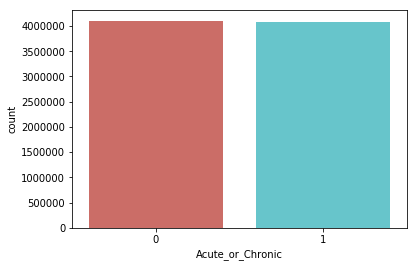

<Figure size 432x288 with 0 Axes>

In [45]:
sns.countplot(x='Acute_or_Chronic', data=df2, palette='hls')
plt.show()
plt.savefig('count_plot')

In [46]:
df2.groupby('Acute_or_Chronic').mean()

,ITEMS,NIC,ACTCOST,QUANTITY
Acute_or_Chronic,,,,
0,8.108113,52.204348,48.713056,946.091538
1,12.840868,80.585229,75.289083,665.557547


# An obsevation
In the plot above it appears to demonstrate that GPs have prescribed similar percentage of acute and chronic prescriptions. Yet in the deeper exploration of the perscription medication, there are more quantity of acute prescriptions. Additionally, for chronic prescription starts off from a higher number off items and with a higher number of NIC (net ingredient cost) and ACTCOST (actual cost in £ & ¢)

In [47]:
df2.groupby('CITY').mean()

,ITEMS,NIC,ACTCOST,QUANTITY,Acute_or_Chronic
CITY,,,,,
,8.218440,52.041713,48.766040,705.308798,0.488355
SLOUGH,16.379267,83.336625,78.135088,1215.962705,0.490518
WRAGBY,8.500969,47.828944,44.403382,448.058624,0.502907
(OFF SOUTH HILL PARK),5.557377,51.799918,48.242857,551.377635,0.496487
1 ALLEYN PARK,11.155091,84.951787,79.400148,985.575320,0.480782
1 BAILEY STREET,11.797565,79.675495,74.326598,908.565304,0.505327
1 ISLINGTON ST SWINDON,7.152557,61.280838,57.068924,732.231041,0.512346
1 ST JAMES ROAD,5.366197,35.299296,32.912739,331.586854,0.489828
1 THE BROADWALK SALFORD,11.987730,63.341679,59.475061,914.078681,0.506902


In [48]:
df2.groupby('POSTALCODE').mean()

,ITEMS,NIC,ACTCOST,QUANTITY,Acute_or_Chronic
POSTALCODE,,,,,
AL1 3FY,11.030349,41.600941,39.388574,488.374810,0.509863
AL1 3HD,12.044776,88.925697,83.149988,1013.396144,0.465174
AL1 3JB,12.243075,83.093068,77.768033,860.342452,0.488920
AL10 0BS,10.549886,58.841203,55.043839,679.562452,0.492765
AL10 0LF,1.477273,55.414091,51.436818,61.954545,0.068182
AL10 0NL,13.162215,78.962117,73.846450,944.086645,0.486645
AL10 0UR,105.153846,1331.665385,1260.264231,40134.730769,0.653846
AL10 8HP,10.538179,62.875822,58.780433,720.357195,0.492658
AL2 1ES,5.004000,36.412187,34.019507,396.444000,0.490667


In [49]:
df2.groupby('PRACTICE').mean()

,ITEMS,NIC,ACTCOST,QUANTITY,Acute_or_Chronic
PRACTICE,,,,,
A81001,7.591143,44.392853,41.498733,549.781153,0.523172
A81002,20.813914,133.932511,124.950153,1499.244061,0.477941
A81004,12.646690,81.225268,75.822467,1000.408711,0.481533
A81005,12.319739,61.008491,57.102129,746.754078,0.505710
A81006,17.764784,104.314551,97.347402,1194.946140,0.505648
A81007,12.731125,84.221749,78.629445,929.738059,0.493837
A81009,11.659738,67.452864,62.979915,820.707467,0.491147
A81011,16.328550,103.178187,96.396299,1334.138595,0.510574
A81012,11.967033,58.600018,54.959304,901.558608,0.500916


In [50]:
# Plotting 

Text(0, 0.5, 'Frequency of prescription')

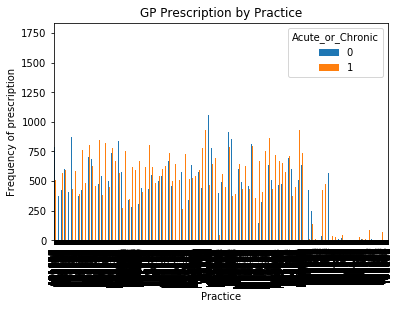

In [51]:
%matplotlib inline
pd.crosstab(df2.PRACTICE,df2.Acute_or_Chronic).plot(kind='bar')
plt.title('GP Prescription by Practice')
plt.xlabel('Practice')
plt.ylabel('Frequency of prescription')
#plt.savefig('frequency_medication')

Text(0, 0.5, 'Perscribed Medication')

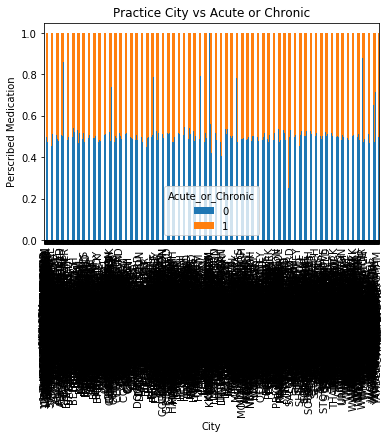

In [52]:
table=pd.crosstab(df2.CITY,df2.Acute_or_Chronic)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Practice City vs Acute or Chronic')
plt.xlabel('City')
plt.ylabel('Perscribed Medication')
#plt.savefig('City vs Acute or Chronic')

# Seaborn Countplot

In [53]:
import numpy as np
import pandas as pd
from os import path
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
len(df2.PRACTICEFULLNAME)

8173814

In [55]:
practicename = df2.PRACTICEFULLNAME

In [56]:
practice_counts = practicename.value_counts()

In [57]:
practice_counts_df = pd.DataFrame({'col':practice_counts})
practice_counts_df = practice_counts_df.sort_values('col', ascending=False)
# Editing the column headers
practice_counts_df.columns = ['Frequency']
practice_counts_df.head()

,Frequency
PARK SURGERY,9638
HIGH STREET SURGERY,9470
TRINITY MEDICAL CENTRE,8658
VILLAGE SURGERY,8519
THE LIMES MEDICAL CENTRE,7772


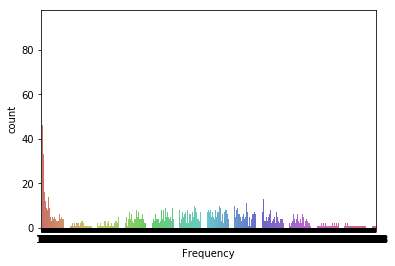

In [58]:
sns.countplot(x='Frequency', data=practice_counts_df, palette='hls')
plt.show()
# plt.savefig('Practice Frequency plot')

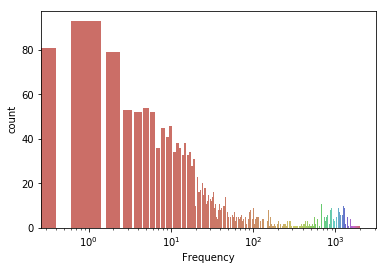

In [59]:
sns.countplot(x='Frequency', data=practice_counts_df, palette='hls')
plt.xscale('log')
plt.show()

# Sklearn

In [61]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
df2.shape #the data contains 8173814 rows and 13 columns.

(8173814, 13)

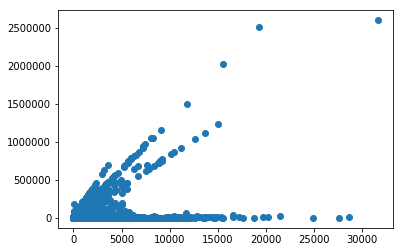

In [63]:
plt.scatter(df2['ACTCOST'], df2['QUANTITY'])

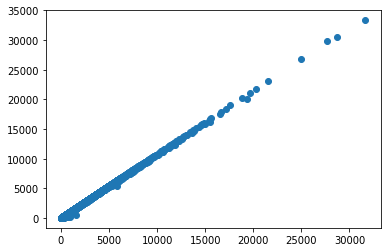

In [64]:
plt.scatter(df2['ACTCOST'], df2['NIC'])

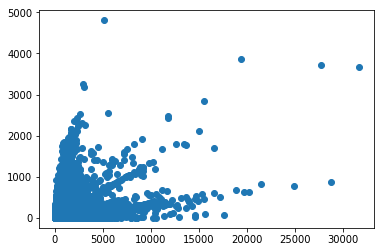

In [65]:
plt.scatter(df2['ACTCOST'], df2['ITEMS'])

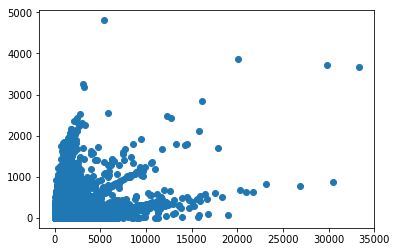

In [66]:
plt.scatter(df2['NIC'], df2['ITEMS'])

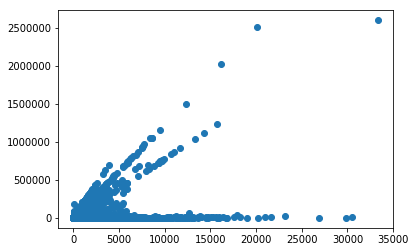

In [67]:
plt.scatter(df2['NIC'], df2['QUANTITY'])

# An obsevation
The plots above demonstrates that the data is heavily skewed in one direction, with clear exception of ACTCOST and NIC. As the ACTCOST is the acutal cost in pounds and pence (£ and ¢) and the NIC is the net ingredient cost. However, in the remainder of the plots do not illustrate to have a higher percentage of confidence in the correlation coefficient as the outputs are monotonic relationship.

As a result, I have decided to no longer pursue the linear regression with the NHS data. Rather, I will be running a logistic regression. 

# Logistic Regression

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8173814 entries, 0 to 8173813
Data columns (total 13 columns):
PRACTICE            object
BNFCODE             object
BNFNAME             object
ITEMS               int64
NIC                 float64
ACTCOST             float64
QUANTITY            float64
PRACTICEFULLNAME    object
STNAME              object
CITY                object
COUNTY              object
POSTALCODE          object
Acute_or_Chronic    int64
dtypes: float64(3), int64(2), object(8)
memory usage: 873.1+ MB


In [70]:
del df2['PRACTICE']
del df2['BNFCODE']
del df2['BNFNAME'] 
del df2['PRACTICEFULLNAME']
del df2['STNAME']
del df2['CITY']
del df2['COUNTY']
del df2['POSTALCODE']

In [71]:
#split dataset in features and target variable
feature_cols = ['ITEMS', 'NIC', 'ACTCOST','QUANTITY']
X = df2[feature_cols] # Features
y = df2.Acute_or_Chronic # Target variable

In [72]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
# splitting the 75% for training and 25% for testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [73]:
# importing the logistic regression
from sklearn.linear_model import LogisticRegression
# instantiating the model
logreg = LogisticRegression()
# fitting the model with data
logreg.fit(X_train,y_train)
# predication
y_pred=logreg.predict(X_test)

/Users/wuonseokchoi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [74]:
# import the metrics
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[827907, 197373],
       [673652, 344522]])

In [75]:
# import the modules for visualisation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

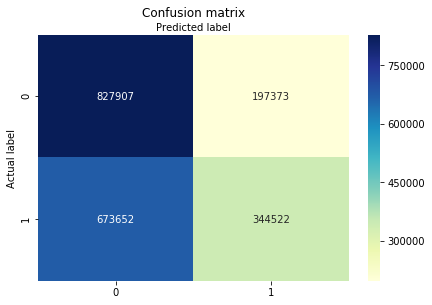

In [76]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Creating heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [77]:
# printing out model evaluation metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5737486628032733
Precision: 0.6357726127755376
Recall: 0.33837241964536513


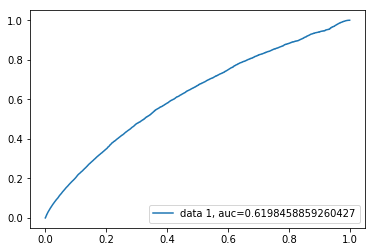

In [78]:
# ROC Curve (Receiver Operating Characteristic)
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [95]:
print("The ROC Curve of this model is", auc)

The ROC Curve of this model is 0.6198458859260427
